Dataset Kaggle : [Dataset](https://www.kaggle.com/datasets/alessiocorrado99/animals10)

Drive Dataset : [URL DRIVE](https://drive.google.com/file/d/1KCy36JAfNf2Jo3CiIjslRIk5zCh6qK6I/view?usp=sharing)

Nama : Celvine

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Rescaling, RandomFlip, RandomRotation
from keras.optimizers import Adam

In [ ]:
if not os.path.exists("dataset"):
  print("Downloading Dataset.....")
  !cp /content/drive/MyDrive/Manage/Development/Dataset/Animal/dataset.zip ./

  print("Unzip Dataset.....")
  !unzip dataset.zip -d dataset

  print("Remove Dataset.zip file")
  !rm dataset2.zip

In [9]:
dataset = "dataset/raw-img"

In [ ]:
!rm -r dataset/raw-img/elefante
!rm -r dataset/raw-img/gatto
!rm -r dataset/raw-img/pecora
!rm -r dataset/raw-img/scoiattolo
!rm -r dataset/raw-img/mucca
!rm -r dataset/raw-img/farfalla
!rm -r dataset/raw-img/cavallo

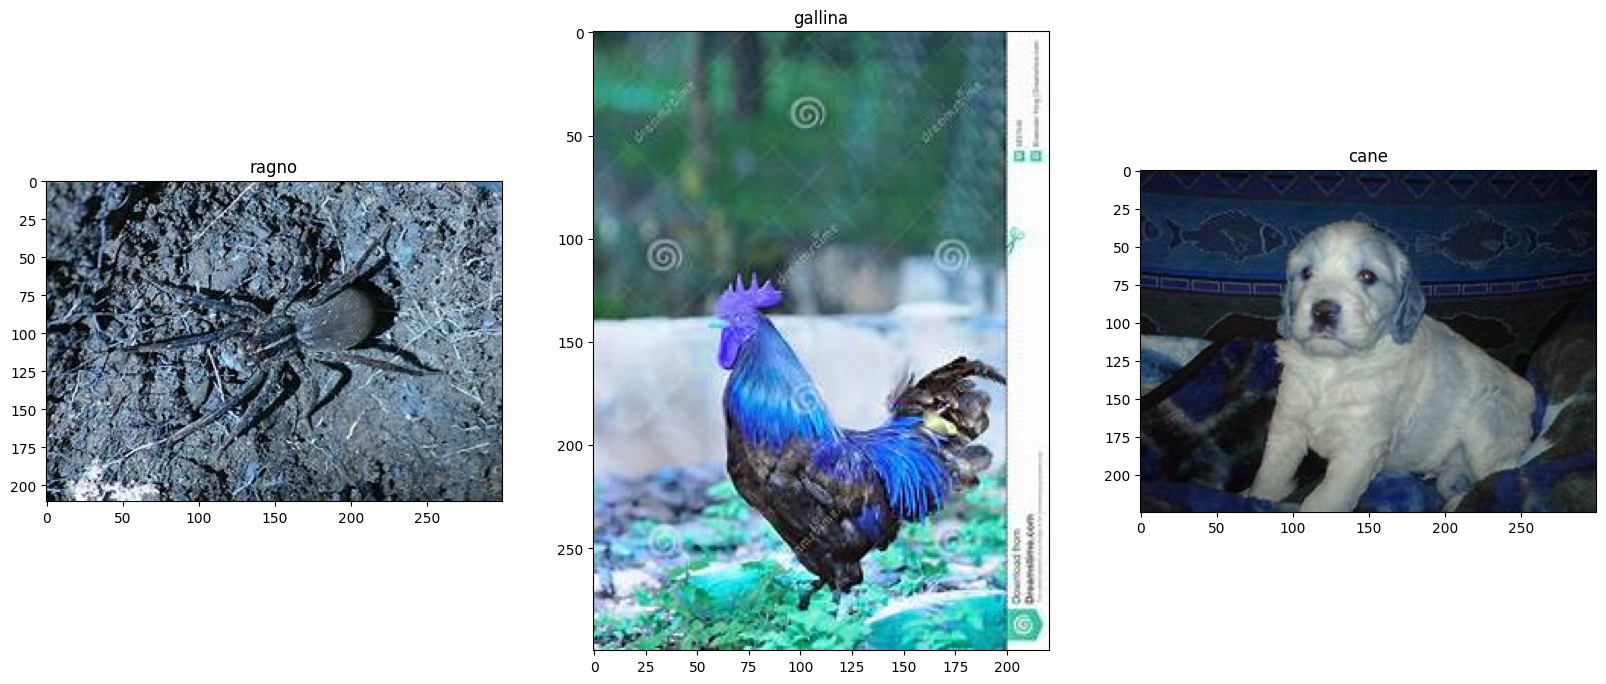

In [45]:
# Preview Image
plt.figure(figsize=(20, 10))
for index, folder in enumerate(os.listdir(dataset)):
  path_folder = os.path.join(dataset, folder)
  if os.path.isdir(path_folder):
    for index_file, file_name in enumerate(os.listdir(path_folder)):
      if index_file < 5:
        img = cv2.imread(os.path.join(dataset, folder, file_name))
        plt.subplot(1, len(os.listdir(dataset)), index + 1)
        plt.imshow(img)
        plt.title(folder)

In [17]:
list_file_name = []
list_file_label = []
list_path = []

for index, folder in enumerate(os.listdir(dataset)):
  path_folder = os.path.join(dataset, folder)
  for index_file, file_name in enumerate(os.listdir(path_folder)):
    list_file_name.append(file_name)
    list_file_label.append(folder)
    list_path.append(os.path.join(folder, file_name))

In [18]:
df = pd.DataFrame({
    "file_name" : list_file_name,
    "path" : list_path,
    "label" : list_file_label
})

df.head()

,file_name,path,label
0,OIP-yQPxH8ylYXtXPC1nCkL6bwAAAA.jpeg,ragno/OIP-yQPxH8ylYXtXPC1nCkL6bwAAAA.jpeg,ragno
1,OIP-gqpJiMu1LScGJ3ay3H2cKwHaIX.jpeg,ragno/OIP-gqpJiMu1LScGJ3ay3H2cKwHaIX.jpeg,ragno
2,OIP-KDVjHglTmV_5XutkTCdcDgHaE7.jpeg,ragno/OIP-KDVjHglTmV_5XutkTCdcDgHaE7.jpeg,ragno
3,OIP-lrImeZVibVAF8EsMteB-TQHaFE.jpeg,ragno/OIP-lrImeZVibVAF8EsMteB-TQHaFE.jpeg,ragno
4,OIP-0Q3yCEaBtflRQL45hj0VCAHaFN.jpeg,ragno/OIP-0Q3yCEaBtflRQL45hj0VCAHaFN.jpeg,ragno


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  12782 non-null  object
 1   path       12782 non-null  object
 2   label      12782 non-null  object
dtypes: object(3)
memory usage: 299.7+ KB


In [20]:
df['label'].value_counts().sort_values()

gallina    3098
ragno      4821
cane       4863
Name: label, dtype: int64

<Axes: >

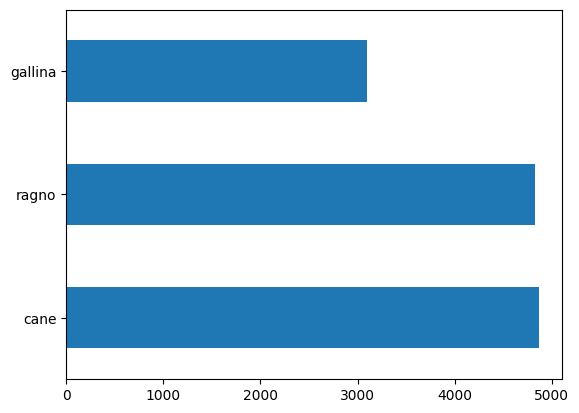

In [21]:
df['label'].value_counts().plot(kind="barh")

In [22]:
batch_size = 32
img_height = 150
img_width = 150

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    label_mode = 'categorical',
    batch_size=batch_size
)

train_class_names = train_ds.class_names
train_class_names

Found 12782 files belonging to 3 classes.
Using 10226 files for training.


['cane', 'gallina', 'ragno']

In [24]:
class_count = {class_name: 0 for class_name in train_class_names}

for images, labels in train_ds:
    for label in labels:
        class_count[train_class_names[tf.argmax(label)]] += 1

for class_name, count in class_count.items():
    print(f"{class_name}: {count}")

cane: 3888
gallina: 2489
ragno: 3849


In [25]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    label_mode = 'categorical',
    batch_size=batch_size,
)

val_class_names = val_ds.class_names
val_class_names

Found 12782 files belonging to 3 classes.
Using 2556 files for validation.


['cane', 'gallina', 'ragno']

In [26]:
class_count = {class_name: 0 for class_name in val_class_names}

for images, labels in val_ds:
    for label in labels:
        class_count[val_class_names[tf.argmax(label)]] += 1

for class_name, count in class_count.items():
    print(f"{class_name}: {count}")

cane: 975
gallina: 609
ragno: 972


In [182]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(train_class_names[labels[i]])
#     plt.axis("off")

In [183]:
# data_augmentation = tf.keras.Sequential([
#   RandomFlip("horizontal_and_vertical"),
#   RandomRotation(0.3),
# ])

In [184]:
# data_augmentation = tf.keras.Sequential(
#     [
#         layers.Rescaling(1.0 / 255),
#         layers.Resizing(img_height, img_width),
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(factor=0.02),
#         layers.RandomBrightness(factor=0.1, value_range=(0, 5.0)),
#         layers.RandomZoom(
#             height_factor=0.2, width_factor=0.2
#         ),
#     ],
#     name="data_augmentation",
# )

In [185]:
# train_data_augmented = train_ds.map(lambda image, label: (data_augmentation(image, training=True), label))

In [28]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(train_class_names), activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [30]:
opt = Adam(learning_rate=0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      print("\n Accuracy and val accuracy > 92%")
      self.model.stop_training = True

callbacks = myCallback()

In [35]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  callbacks=[callbacks]
)

Epoch 1/100
320/320 [==============================] - 13s 40ms/step - loss: 0.0355 - accuracy: 0.9866 - val_loss: 0.4438 - val_accuracy: 0.9057
Epoch 2/100
320/320 [==============================] - 14s 43ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.4479 - val_accuracy: 0.9073
Epoch 3/100
320/320 [==============================] - 14s 42ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.4379 - val_accuracy: 0.9077
Epoch 4/100
320/320 [==============================] - 12s 38ms/step - loss: 0.0274 - accuracy: 0.9903 - val_loss: 0.4628 - val_accuracy: 0.9135
Epoch 5/100
320/320 [==============================] - 24s 75ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.4320 - val_accuracy: 0.9104
Epoch 6/100
320/320 [==============================] - 16s 46ms/step - loss: 0.0346 - accuracy: 0.9870 - val_loss: 0.4522 - val_accuracy: 0.9073
Epoch 7/100
320/320 [==============================] - 13s 40ms/step - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.4423 - val_ac

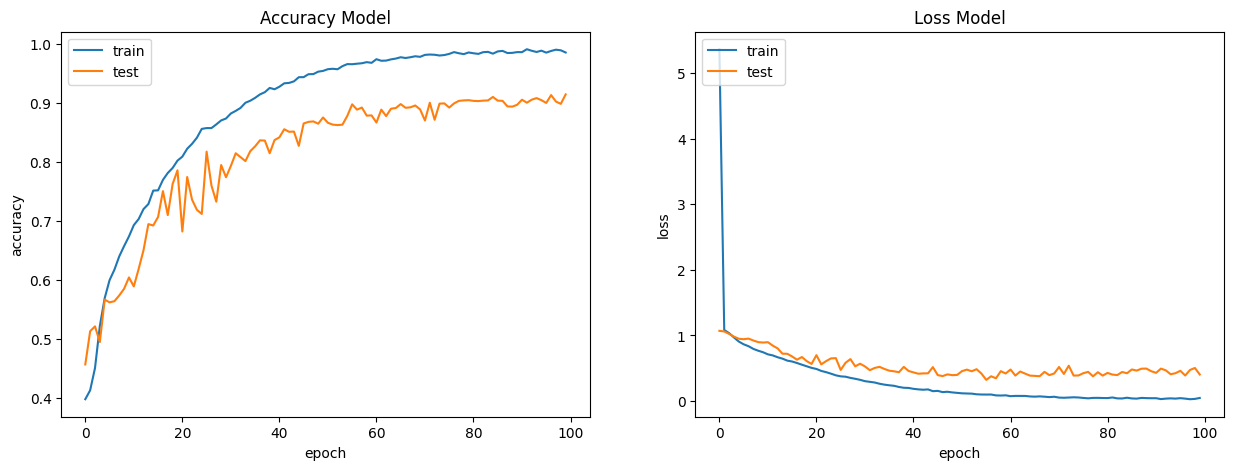

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [36]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

In [37]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [38]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)